In [21]:
# This program uses Monte Carlo to simulate the 1D Ising spin chain
# It is well known that 1D spin chain does not have phase transition at T>0

# Suppose we create a spin flip, 
# (1) Energy change: ΔE=2J
# (2) There are N choices to flip spin, so ΔS = ln N
# (3) Free energy: ΔF = ΔE - TΔS = 2J-T(ln N)
# (4) When T>0, always ΔS dominates ---> No thermal phase transition!

# But we cannot simulate N->infty, so let's see how the E(T), M(T), χ(T), and c(T) look like!
# Well, we expect there is a FAKE transition at 2J = Tc (ln N) when N is finite
# Therefore, Tc ~ 1/ln (N) in finite-size simulation

In [22]:
%matplotlib inline
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

In [23]:
#----------------------------------------------------------------------
##  BLOCK OF FUNCTIONS USED IN THE MAIN CODE
#----------------------------------------------------------------------
def initialstate(N):   
    ''' generates a random spin configuration for initial condition'''
    state = np.random.choice([-1,1], size=(N))
    return state

def mcmove(config, beta):
    '''Monte Carlo move using Metropolis algorithm '''
    for i in range(N):
        a = np.random.randint(0, N)
        s =  config[a]
        nb = config[(a+1)%N] + config[(a-1)%N]
        cost = 2*s*nb
        if cost < 0:
            s *= -1
        elif rand() < np.exp(-cost*beta):
            s *= -1
        config[a] = s
    return config


def calcEnergy(config):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(len(config)):
        
        S = config[i]
        nb = config[(i+1)%N] + config[(i-1)%N]
        energy += -nb*S
        
    return energy/4.


def calcMag(config):
    '''Magnetization of a given configuration'''
    mag = np.sum(config)

    return mag

def calcpairMag(config):
    '''product of magnetization between nearest spins of a given configuration'''
    
    pairmag = 0
    
    for i in range(N):
        pairmag += config[i]*config[(i+1)%N]
    
    return pairmag

In [24]:
## change these parameters for a smaller (faster) simulation 
nt      = 500         #  number of temperature points
N       = 10         #  size of the lattice, N x N
eqSteps = 1000       #  number of MC sweeps for equilibration
mcSteps = 1000       #  number of MC sweeps for calculation

T       = np.linspace(0.01, 5, nt); 
E,M,C,X,Mij = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n1, n2  = 1.0/(mcSteps*N), 1.0/(mcSteps*mcSteps*N) 
# divide by number of samples, and by system size to get intensive values

In [25]:
#----------------------------------------------------------------------
#  MAIN PART OF THE CODE
#----------------------------------------------------------------------
for tt in range(nt):
    E1 = M1 = E2 = M2 = Mpair = 0
    config = initialstate(N)
    iT=1.0/T[tt]; iT2=iT*iT;
    
    for i in range(eqSteps):         # equilibrate
        mcmove(config, iT)           # Monte Carlo moves

    for i in range(mcSteps):
        mcmove(config, iT)           
        Ene = calcEnergy(config)     # calculate the energy
        Mag = calcMag(config)        # calculate the magnetisation
        Mag2 = calcpairMag(config)   # calculate the sum of SiSj for neighboring spins

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene
        
        Mpair = Mpair + Mag2

    E[tt] = n1*E1
    M[tt] = n1*M1
    C[tt] = (n1*E2 - n2*E1*E1)*iT2
    X[tt] = (n1*M2 - n2*M1*M1)*iT
    Mij[tt] = n1*Mpair

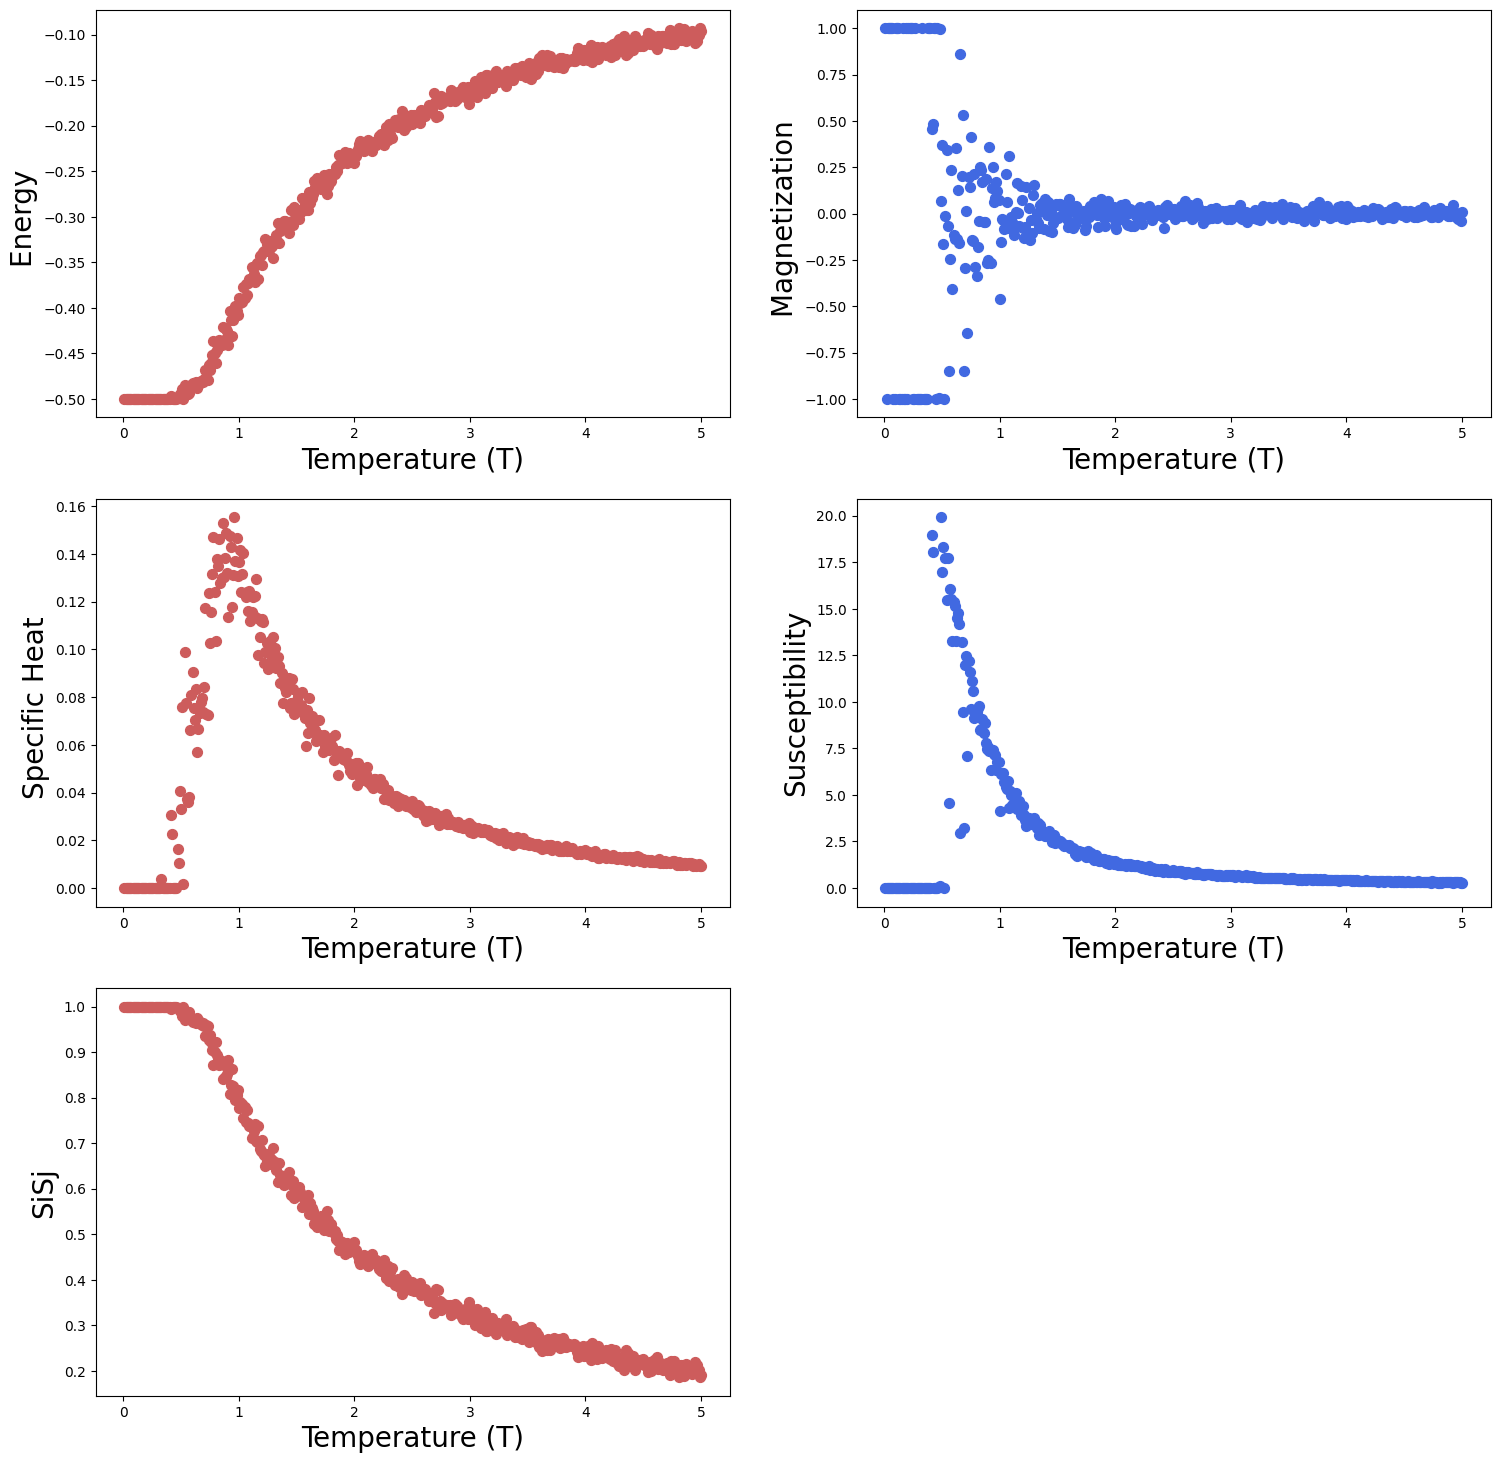

In [26]:
# 1D Ising chain, 10 spins

f = plt.figure(figsize=(18, 18)); # plot the calculated values    

sp =  f.add_subplot(3, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

sp =  f.add_subplot(3, 2, 2 );
plt.scatter(T, M, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

sp =  f.add_subplot(3, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

sp =  f.add_subplot(3, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');

sp =  f.add_subplot(3, 2, 5 );
plt.scatter(T, Mij, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("SiSj", fontsize=20);   plt.axis('tight');

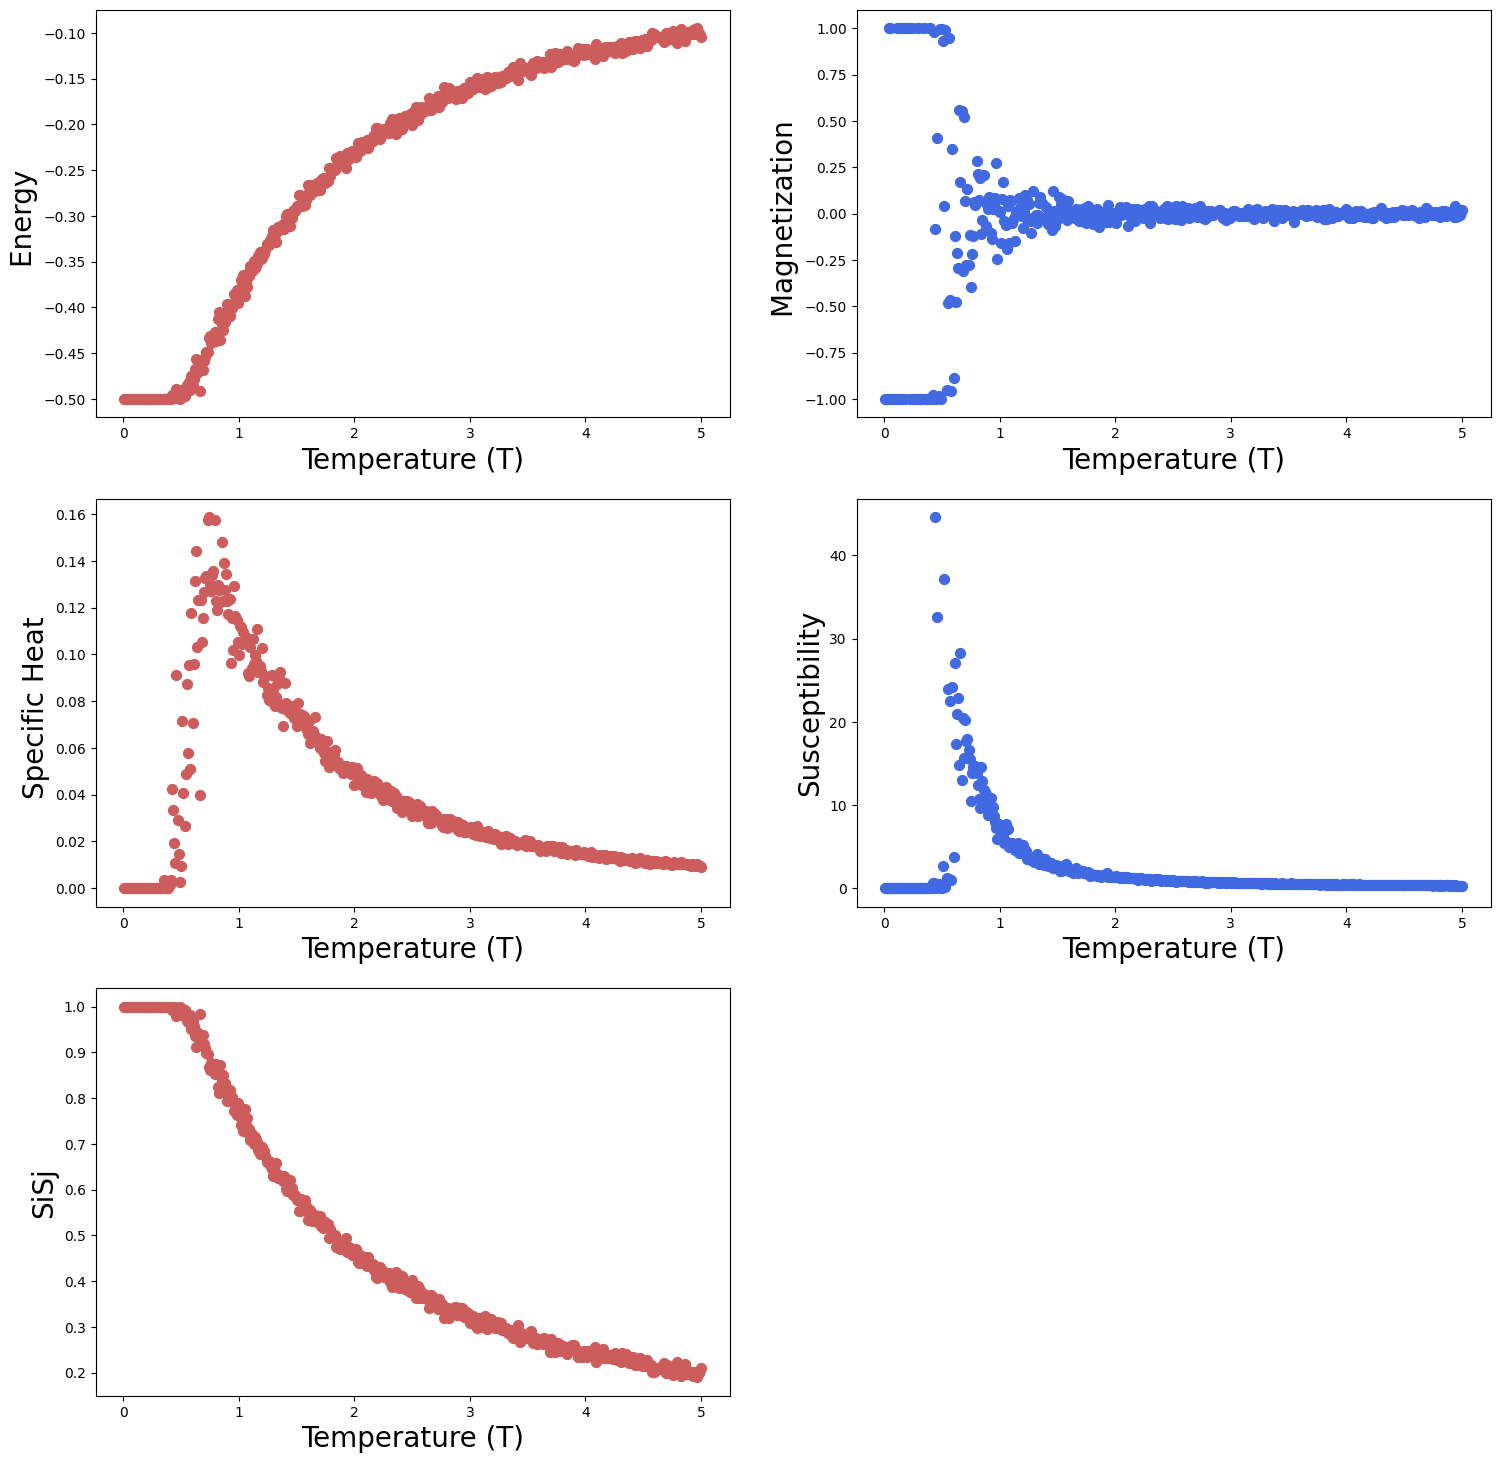

In [11]:
# 1D Ising chain, 20 spins

f = plt.figure(figsize=(18, 18)); # plot the calculated values    

sp =  f.add_subplot(3, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

sp =  f.add_subplot(3, 2, 2 );
plt.scatter(T, M, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

sp =  f.add_subplot(3, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

sp =  f.add_subplot(3, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');

sp =  f.add_subplot(3, 2, 5 );
plt.scatter(T, Mij, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("SiSj", fontsize=20);   plt.axis('tight');

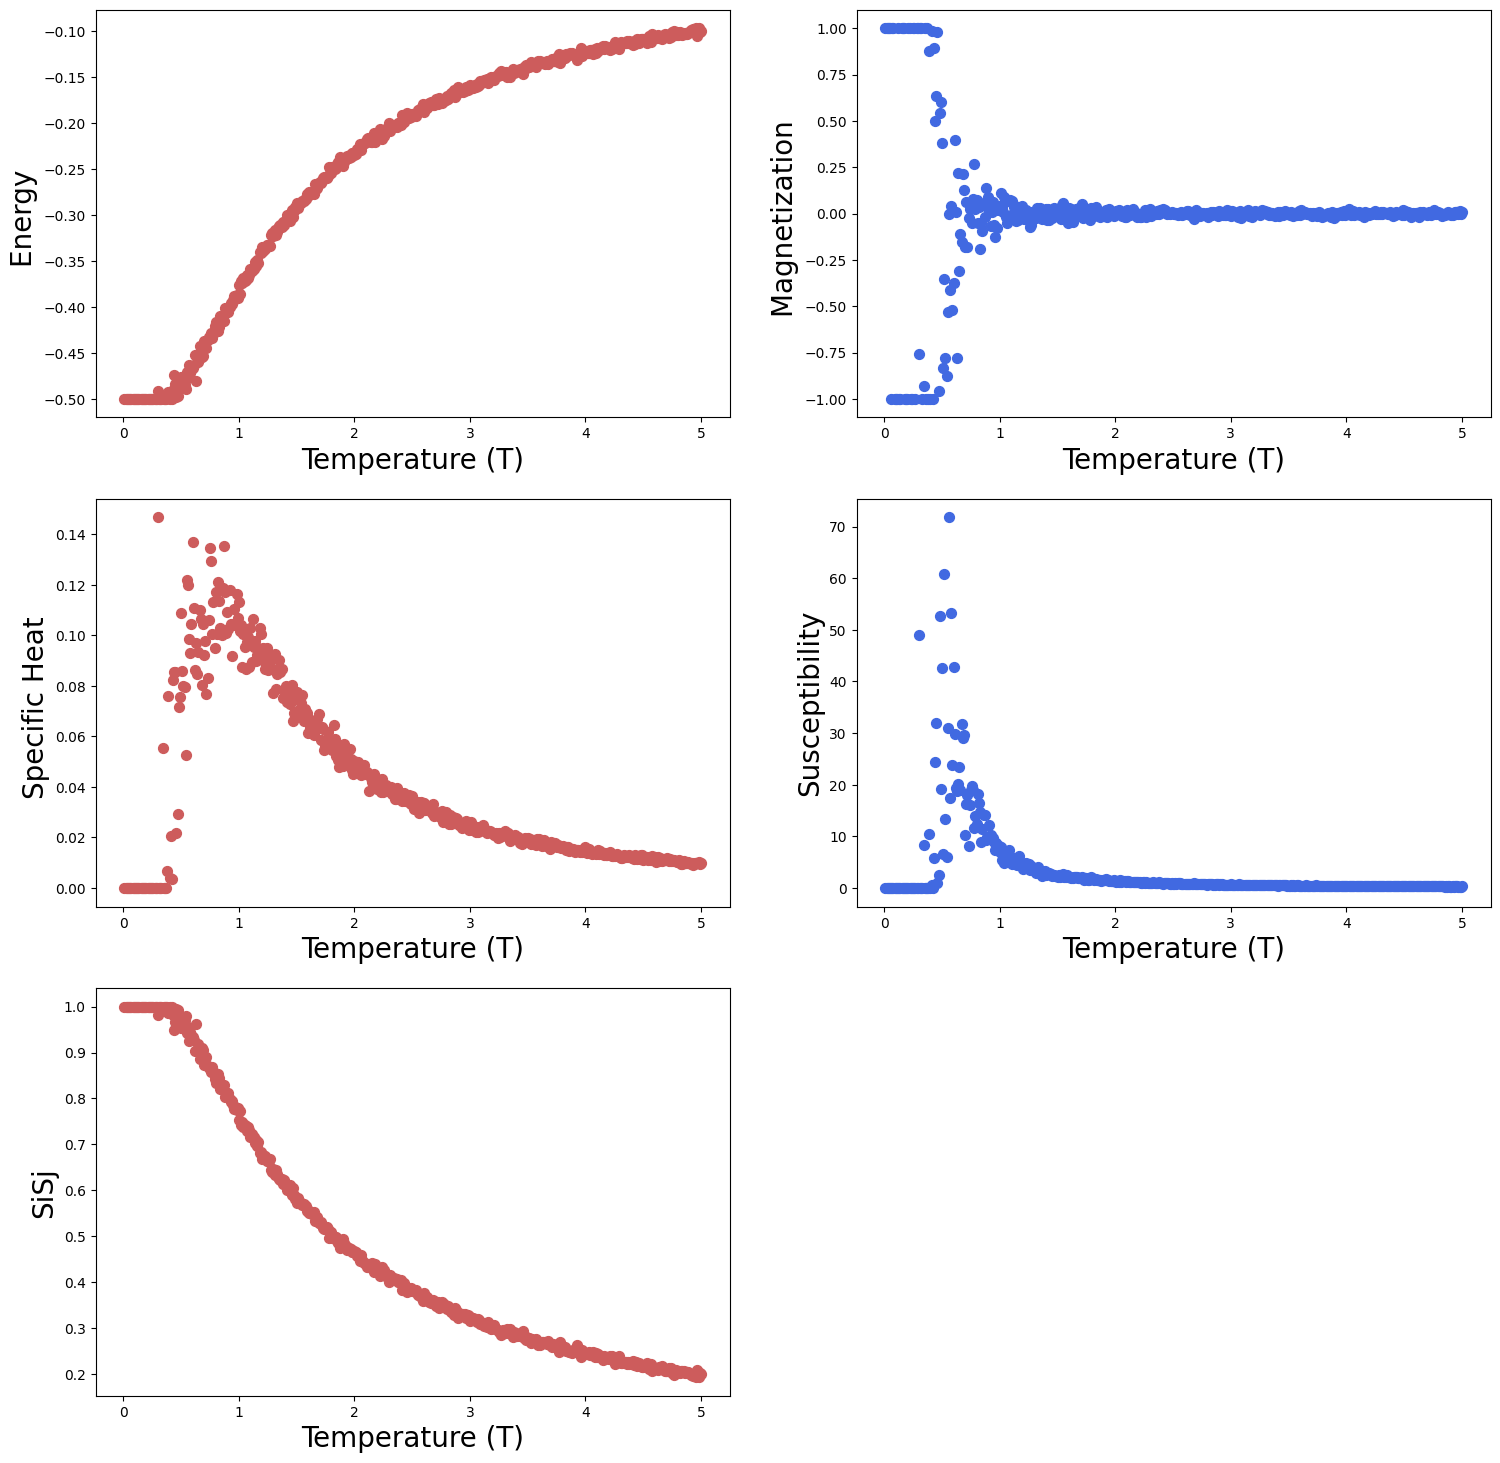

In [34]:
# 1D Ising chain, 60 spins

f = plt.figure(figsize=(18, 18)); # plot the calculated values    

sp =  f.add_subplot(3, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

sp =  f.add_subplot(3, 2, 2 );
plt.scatter(T, M, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

sp =  f.add_subplot(3, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

sp =  f.add_subplot(3, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');

sp =  f.add_subplot(3, 2, 5 );
plt.scatter(T, Mij, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("SiSj", fontsize=20);   plt.axis('tight');

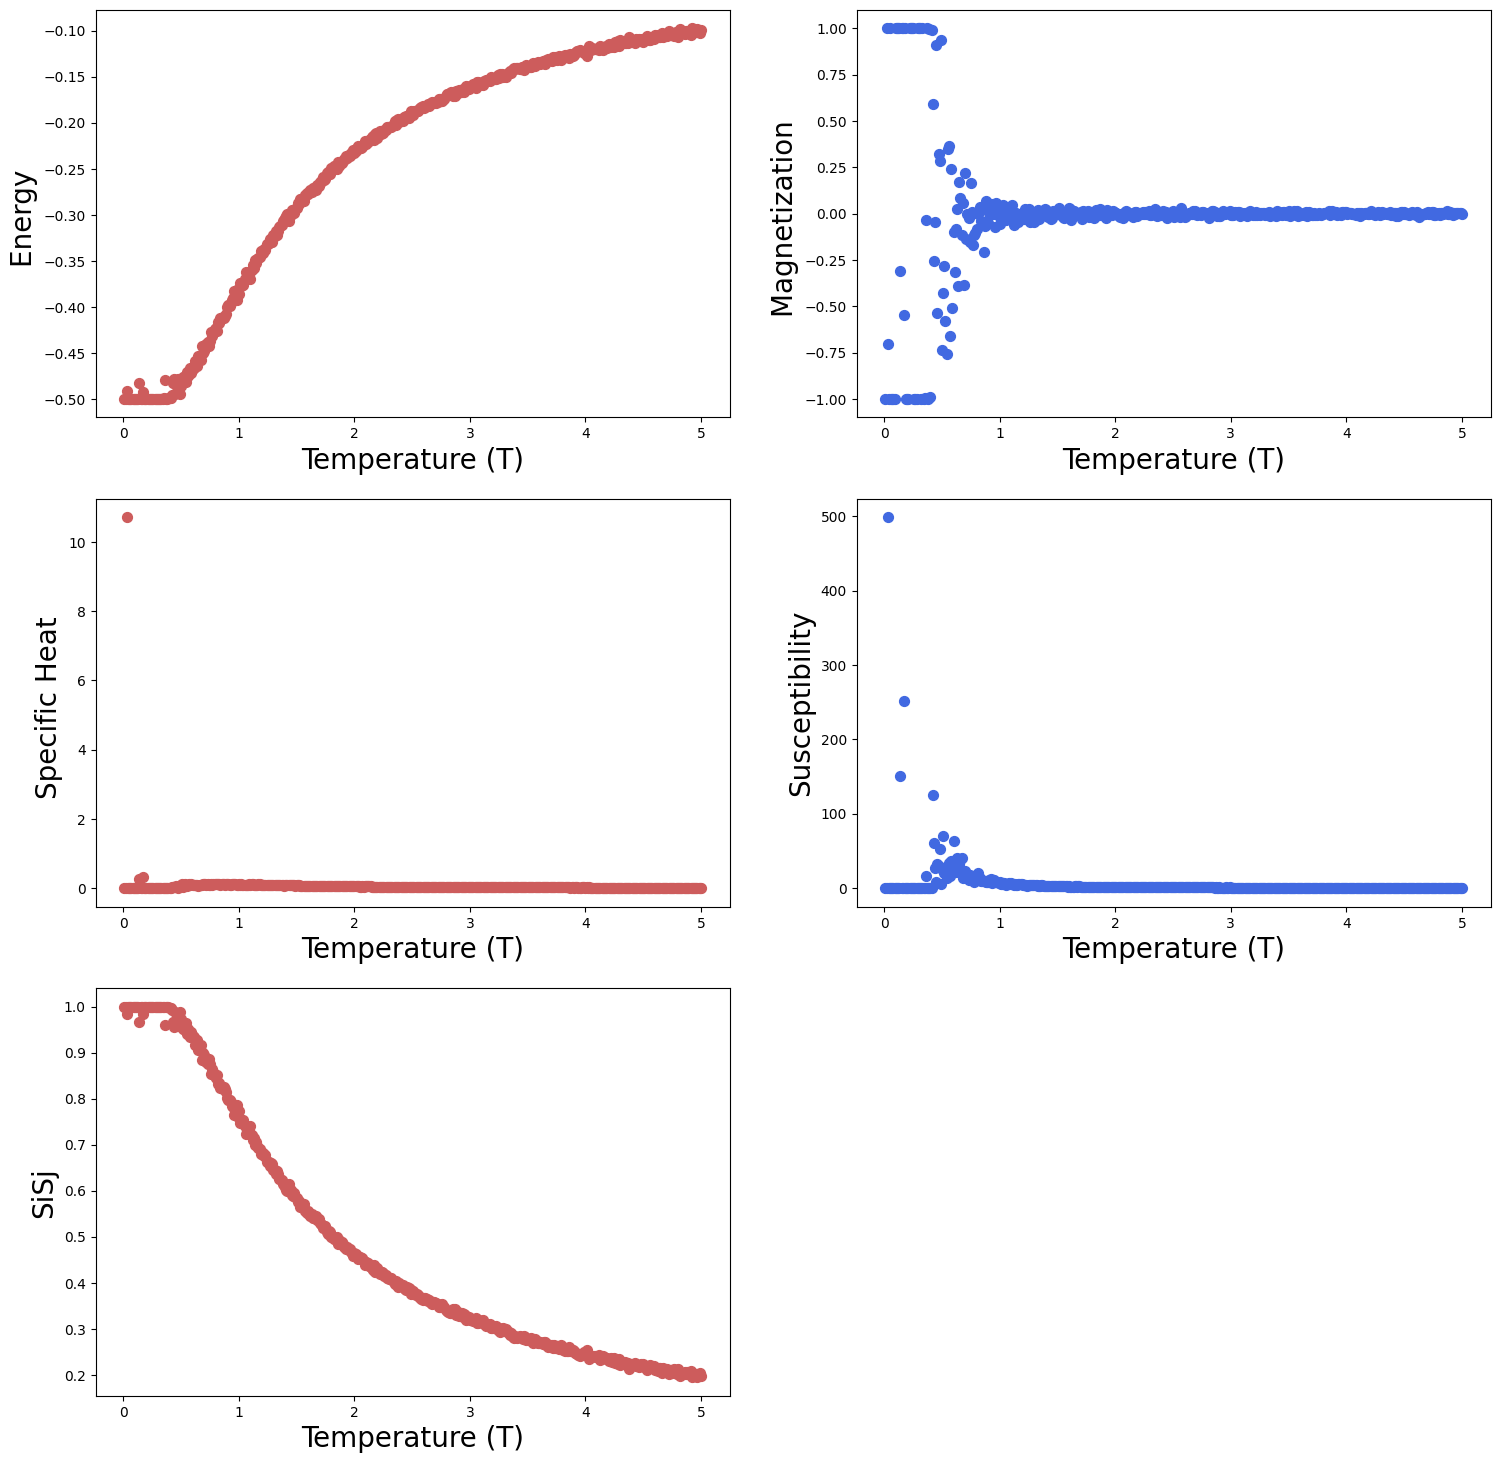

In [5]:
# 1D Ising chain, 100 spins

f = plt.figure(figsize=(18, 18)); # plot the calculated values    

sp =  f.add_subplot(3, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

sp =  f.add_subplot(3, 2, 2 );
plt.scatter(T, M, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

sp =  f.add_subplot(3, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

sp =  f.add_subplot(3, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');

sp =  f.add_subplot(3, 2, 5 );
plt.scatter(T, Mij, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("SiSj", fontsize=20);   plt.axis('tight');

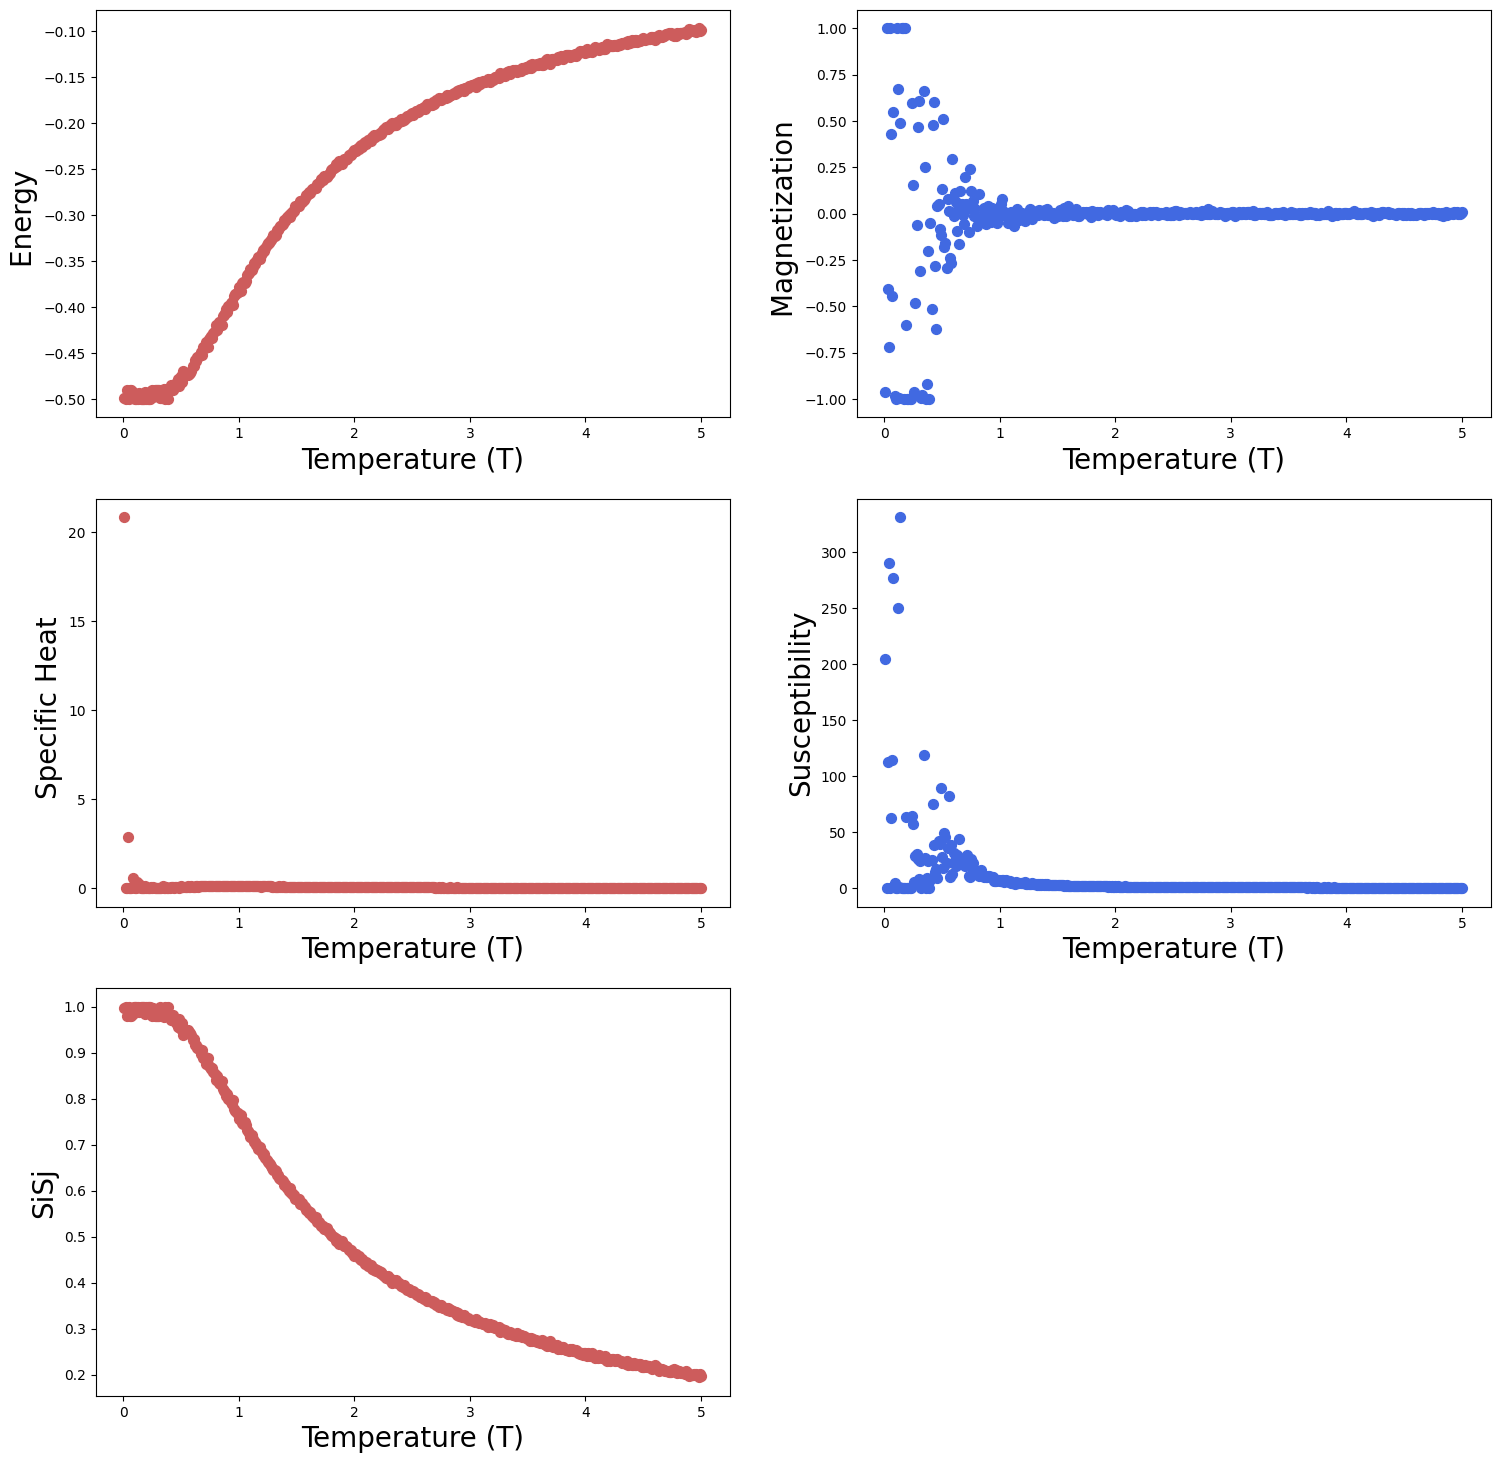

In [17]:
# 1D Ising chain, 200 spins

f = plt.figure(figsize=(18, 18)); # plot the calculated values    

sp =  f.add_subplot(3, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

sp =  f.add_subplot(3, 2, 2 );
plt.scatter(T, M, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

sp =  f.add_subplot(3, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

sp =  f.add_subplot(3, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');

sp =  f.add_subplot(3, 2, 5 );
plt.scatter(T, Mij, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("SiSj", fontsize=20);   plt.axis('tight');